# Ecuaciones de segundo orden
Las ecuaciones diferenciales ordinarias de segundo orden son d ela forma $ay''+by'+cy=0$
Un caso aplicado de este tipo de ecuaciones es el movimiento de un oscilador armónico amortiguado cuya ecuaciones es:
$$m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0$$
y donde sus constantes son la masa $m$, un coeficiente de amortiguación $c$, y la constante del resorte $k$. La solución de esta ecuación esta dada en términos de la posición del objeto que oscila.Esta ecuación tiene tres tipos de soluciones que dependen de las constantes del sistema
$c^2-4mk>0$ sistema sobre amortiguado, el objeto regresa a su posición de equilibrio de forma lenta pero sin oscilar.
$c^2-4mk=0$ sistema criticamente amortiguado, el objeto regresa a su posición de equilibrio sin oscilar.
$c^2-4m<0$ sistema subamortiguado, el objeto regresa a su posición de equilibrio oscilando y decayendo exponencialmente.

Esta ecuación puede reducirse de orden para hacer los cálculos de forma mas eficiente. La ecuación del oscilador se escribe ahora en términos de su frecuencia de oscilación $\omega_0=\sqrt{\frac{k}{m}}$ y el factor de amortiguamiento $\zeta=\frac{c}{2\sqrt{mk}}$ como:
$$\frac{d^2x}{dt^2}+2\zeta\omega_0\frac{dx}{dt}+\omega_0^2x=0$$
Se define $v=\frac{dx}{dt}$ para convertirla en un sistema de dos EDOs de primer orden:
$$\left\{ \begin{array}{l} \frac{dx}{dt}=v \\ \frac{dv}{dt}=-2\zeta\omega_0v-\omega_0^2x\end{array} \right.$$

## Método de Euler
Recordando que el método de Euler calcula la solución de la EDO de la forma $\frac{dy}{dx}=f(x,y)$ como $y_{n+1}=y_n+f(x_n,y_n)\Delta x$. 
Para aproximar la soluciones de este sistema de ecuaciones en el tiempo $t_{n+1}=t_n+h$ donde $h$ es el incremento en la variable independiente y definido por el usuario,
Para $x(t)$ de la primer ecuación:
$$x_{n+1}=x_n+\left.h\cdot\frac{dx}{dt}\right|_{t_n}=x_n+h\cdot v_n$$
Para  de la segunda ecuación:
$$v_{n+1}=v_n+h\cdot \left.\frac{dv}{dt}\right|_{t_n}=v_n+h\cdot(-2\zeta\omega_0v_n-\omega_0^2x_n)$$
donde la funcion de esta segunda ecuación es $f(t_n,x_n,v_n)=-2\zeta\omega_0v_n-\omega_0^2x_n$.
El error para este método es de  ya que el error se calcula a traves de la expansión por serie de Taylor $(^TE)$ como 
$$^TE=\frac{h^2}{2}\left(\frac{d^2x}{dt^2}\,,\,\frac{d^2v}{dt^2}\right)$$

Error Euler: 0.003308630824979394


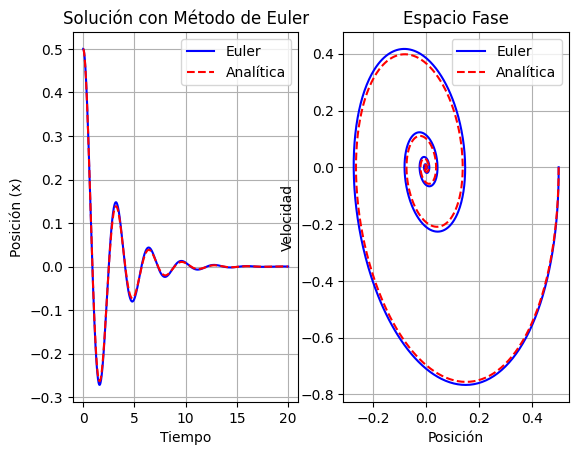

In [7]:
# Inicialización
x_euler = np.zeros(N)
v_euler = np.zeros(N)
x_euler[0] = x0
v_euler[0] = v0

# Iteración Euler
for i in range(N-1):
    x_euler[i+1] = x_euler[i] + h * v_euler[i]
    v_euler[i+1] = v_euler[i] + h * (-2*zeta*omega0*v_euler[i] - omega0**2*x_euler[i])

# Solución analítica
omega_d = omega0 * np.sqrt(1 - zeta**2)
x_analitica = np.exp(-zeta*omega0*t) * (x0*np.cos(omega_d*t) + (v0 + zeta*omega0*x0)/omega_d * np.sin(omega_d*t))
v_analitica = (-zeta*omega0*np.exp(-zeta*omega0*t) * (x0*np.cos(omega_d*t) + (v0 + zeta*omega0*x0)/omega_d * np.sin(omega_d*t))) + (np.exp(-zeta*omega0*t) * (-x0*omega_d*np.sin(omega_d*t) + (v0 + zeta*omega0*x0)/omega_d * omega_d*np.cos(omega_d*t)))

# Error
error_euler = np.sqrt(np.mean((x_euler - x_analitica)**2))
print(f"Error Euler: {error_euler}")

# Gráfico
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(t, x_euler, 'b-', t, x_analitica, 'r--')
plt.legend(['Euler', 'Analítica'])
plt.title('Solución con Método de Euler')
plt.xlabel('Tiempo')
plt.ylabel('Posición (x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_euler, v_euler, 'b-', x_analitica, v_analitica, 'r--')
plt.legend(['Euler', 'Analítica'])
plt.title('Espacio Fase')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.grid(True)

plt.show()

## Método de Euler mejorado
Reconrdando que el método de Euler mejorado usa la integral de trapecio para resolver la ecución diferencial $y(x)=\int_a^b f(x,y)dx$ ydentro de esta integral utiliza el método de Euler para calcular el valor implicito en esta integral. A este cálculo se le conoce como predictor.
Aplicando este método para el sistema de ecuaciones:
Cálculo del predictor, es decir el método de Euler para el paso $n-esimo$:
$$\left\{ \begin{array}{l} x^*=x_n+h\cdot v_n \\ v^*=v_n+h\cdot f(t_n,x_n,v_n)\end{array} \right.$$
Aplicando el método Euler mejorado usando el predictor:
$$\left\{ \begin{array}{l} x_{n+1}=x_n+\frac{h}{2}\cdot (v_n+v^* \\ v_{n+1}=v_n+\frac{h}{2}\cdot \left[f(t_n,x_n,v_n)+f(t_{n+1},x^*,v^*)\right]\end{array} \right.$$
El error para este método es de  ya que el error se calcula a traves de la expansión por serie de Taylor $(^TE)$ como 
$$^TE\approx\frac{h^3}{6}\left(\frac{d^3x}{dt^3}\,,\,\frac{d^3v}{dt^3}\right)$$

Error Heun: 5.977098545601108e-05


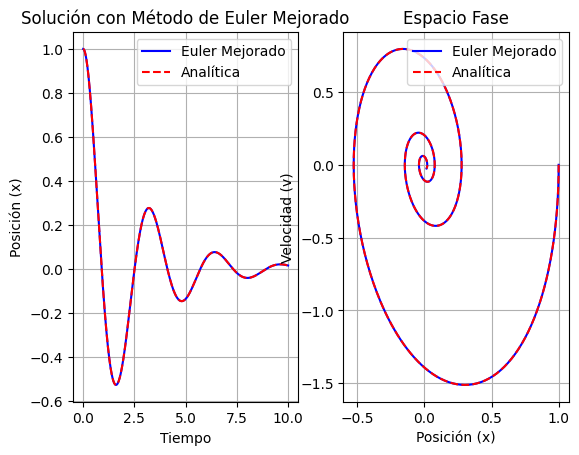

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del oscilador
zeta = 0.2       # Coeficiente de amortiguamiento (<1: subamortiguado)
omega0 = 2.0     # Frecuencia natural
x0 = 1.0         # Posición inicial
v0 = 0.0         # Velocidad inicial

# Tiempo de simulación
t_max = 10
h = 0.01         # Paso de tiempo
t = np.arange(0, t_max + h, h)
N = len(t)

# Inicialización
x_heun = np.zeros(N)
v_heun = np.zeros(N)
x_heun[0] = x0
v_heun[0] = v0

# Iteración Heun
for i in range(N-1):
    # Predictor (Euler)
    x_pred = x_heun[i] + h * v_heun[i]
    v_pred = v_heun[i] + h * (-2*zeta*omega0*v_heun[i] - omega0**2*x_heun[i])
    
    # Corrector (Heun)
    x_heun[i+1] = x_heun[i] + h/2 * (v_heun[i] + v_pred)
    v_heun[i+1] = v_heun[i] + h/2 * ((-2*zeta*omega0*v_heun[i] - omega0**2*x_heun[i]) + \
                                     (-2*zeta*omega0*v_pred - omega0**2*x_pred))

# Solución analítica
omega_d = omega0 * np.sqrt(1 - zeta**2)
x_analitica = np.exp(-zeta*omega0*t) * (x0*np.cos(omega_d*t) + (v0 + zeta*omega0*x0)/omega_d * np.sin(omega_d*t))
v_analitica = (-zeta*omega0*np.exp(-zeta*omega0*t) * (x0*np.cos(omega_d*t) + (v0 + zeta*omega0*x0)/omega_d * np.sin(omega_d*t))) + (np.exp(-zeta*omega0*t) * (-x0*omega_d*np.sin(omega_d*t) + (v0 + zeta*omega0*x0)/omega_d * omega_d*np.cos(omega_d*t)))

# Error
error_heun = np.sqrt(np.mean((x_heun - x_analitica)**2))
print(f"Error Heun: {error_heun}")

# Gráfico
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(t, x_heun, 'b-', t, x_analitica, 'r--')
plt.legend(['Euler Mejorado', 'Analítica'])
plt.title('Solución con Método de Euler Mejorado')
plt.xlabel('Tiempo')
plt.ylabel('Posición (x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_heun, v_heun, 'b-', x_analitica, v_analitica, 'r--')
plt.legend(['Euler Mejorado', 'Analítica'])
plt.title('Espacio Fase')
plt.xlabel('Posición (x)')
plt.ylabel('Velocidad (v)')
plt.grid(True)

plt.show()

## Método de Runge-Kutta
Recordando el método de Runge-Kutta de orden 4, los coeficientes se obtienen para cada una de las ecuaciones, para $x(t)$ y $v(t)$, de tal forma que las pendientes se calculan como:
Primer pendiente $k_1$
$$\left\{ \begin{array}{l} k_{1x}=v_n\\ k_{1v}=f(t_n,x_n,v_n)\end{array} \right.$$
Segunda pendiente $k_2$
$$\left\{ \begin{array}{l} k_{2x}=v_n+\frac{h}{2}k_{1v}\\ k_{2v}=f\left(t_n+\frac{h}{2}\,,\,x_n+\frac{h}{2}k_{1x}\,,\,v_n+\frac{h}{2}k_{1v}\right)\end{array} \right.$$
Tercera pendiente $k_3$
$$\left\{ \begin{array}{l} k_{3x}=v_n+\frac{h}{2}k_{2v}\\ k_{3v}=f\left(t_n+\frac{h}{2}\,,\,x_n+\frac{h}{2}k_{2x}\,,\,v_n+\frac{h}{2}k_{2v}\right)\end{array} \right.$$
Cuarta pendiente $k_4$
$$\left\{ \begin{array}{l} k_{4x}=v_n+h\,k_{3v}\\ k_{4v}=f\left(t_n+\frac{h}{2}\,,\,x_n+h\,k_{3x}\,,\,v_n+h\,k_{3v}\right)\end{array} \right.$$
Y donde el cálculo de los valores para la posición y la velocidad para cada una de las EDO del sistema es
$$\left\{ \begin{array}{l} x_{n+1}=x_n+\frac{h}{6}(k_{1x}+2k_{2x}+2k_{3x}+k_{4x})\\ v_{n+1}=v_n+\frac{h}{6}(k_{1v}+2k_{2v}+2k_{3v}+k_{4v})\end{array} \right.$$
El error para este método es de  ya que el error se calcula a traves de la expansión por serie de Taylor $(^TE)$ como 
$$^TE\approx\frac{h^5}{120}\left(\frac{d^5x}{dt^5}\,,\,\frac{d^5v}{dt^5}\right)$$

Error RK4: 1.1936321241047017e-09


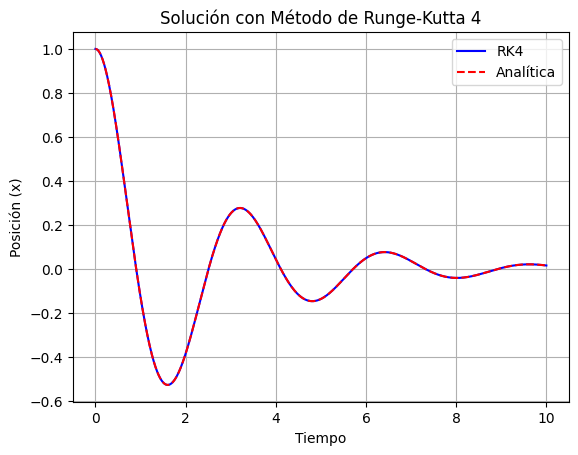

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del oscilador
zeta = 0.2       # Coeficiente de amortiguamiento (<1: subamortiguado)
omega0 = 2.0     # Frecuencia natural
x0 = 1.0         # Posición inicial
v0 = 0.0         # Velocidad inicial

# Tiempo de simulación
t_max = 10
h = 0.01         # Paso de tiempo
t = np.arange(0, t_max + h, h)
N = len(t)

# Inicialización
x_rk4 = np.zeros(N)
v_rk4 = np.zeros(N)
x_rk4[0] = x0
v_rk4[0] = v0

# Iteración RK4
for i in range(N-1):
    # Pendientes k1
    k1x = v_rk4[i]
    k1v = -2*zeta*omega0*v_rk4[i] - omega0**2*x_rk4[i]
    
    # Pendientes k2
    k2x = v_rk4[i] + h/2 * k1v
    k2v = -2*zeta*omega0*(v_rk4[i] + h/2*k1v) - omega0**2*(x_rk4[i] + h/2*k1x)
    
    # Pendientes k3
    k3x = v_rk4[i] + h/2 * k2v
    k3v = -2*zeta*omega0*(v_rk4[i] + h/2*k2v) - omega0**2*(x_rk4[i] + h/2*k2x)
    
    # Pendientes k4
    k4x = v_rk4[i] + h * k3v
    k4v = -2*zeta*omega0*(v_rk4[i] + h*k3v) - omega0**2*(x_rk4[i] + h*k3x)
    
    # Actualización
    x_rk4[i+1] = x_rk4[i] + h/6 * (k1x + 2*k2x + 2*k3x + k4x)
    v_rk4[i+1] = v_rk4[i] + h/6 * (k1v + 2*k2v + 2*k3v + k4v)

# Solución analítica
omega_d = omega0 * np.sqrt(1 - zeta**2)
x_analitica = np.exp(-zeta*omega0*t) * (x0*np.cos(omega_d*t) + (v0 + zeta*omega0*x0)/omega_d * np.sin(omega_d*t))

# Error
error_rk4 = np.sqrt(np.mean((x_rk4 - x_analitica)**2))
print(f"Error RK4: {error_rk4}")

# Gráfico
plt.figure()
plt.plot(t, x_rk4, 'b-', t, x_analitica, 'r--')
plt.legend(['RK4', 'Analítica'])
plt.title('Solución con Método de Runge-Kutta 4')
plt.xlabel('Tiempo')
plt.ylabel('Posición (x)')
plt.grid(True)
plt.show()

## Ejemplo Oscilador de Duffing
La ecuación del oscilador de Duffing es un una EDO no lineal que describe
$\frac{d^2x}{dt^2}+\delta\frac{dx}{dt}+\alpha x+\beta x^3=0$
donde $\delta$ es un término de amortiguamiento o fricción, $\alpha$ es un término de rigidez y $\beta$ es el término no lineal.
Esta ecuación describe modelos asociados a, por ejemplo:
La no linealidad cúbica $(\beta x^3)$ que captura la deformación no elástica de rocas.
Si en lugar de cubico es cuadrático $(\theta x^2)$ es posible simular deformación asimétrica en fallas geológicas.
El forzamiento en el término $\delta \text{cos}(\omega t)$ simula tensiones periódicas y acumuladas por placas tectónicas. Si $\delta>0$ las soluciones se presentan caóticas.

### Método de Euler

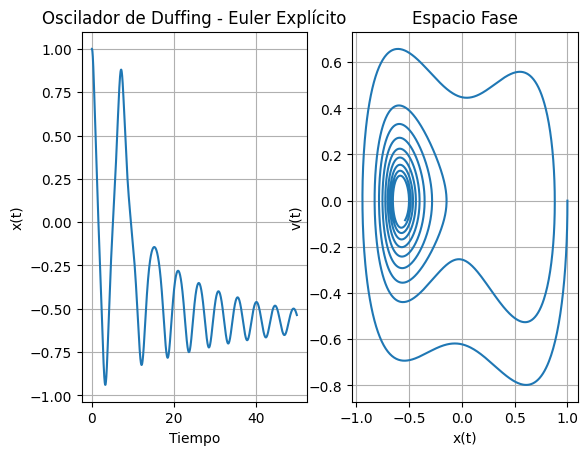

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
delta = 0.1
alpha = -1.0
beta = 3.0
beta_min = 0
beta_max = 10
beta_pasos = 1
x0 = 1.0
v0 = 0.0
t_max = 50
h = 0.01
t = np.arange(0, t_max + h, h)
N = len(t)

# Inicialización
x_euler = np.zeros(N)
v_euler = np.zeros(N)
x_euler[0] = x0
v_euler[0] = v0

# Iteración
for i in range(N-1):
    x_euler[i+1] = x_euler[i] + h * v_euler[i]
    v_euler[i+1] = v_euler[i] + h * (-delta*v_euler[i] - alpha*x_euler[i] - beta*x_euler[i]**3)

# Gráfico
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(t, x_euler)
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Oscilador de Duffing - Euler Explícito')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_euler, v_euler)
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.title('Espacio Fase')
plt.grid(True)

plt.show()

### Método de Euler mejorado

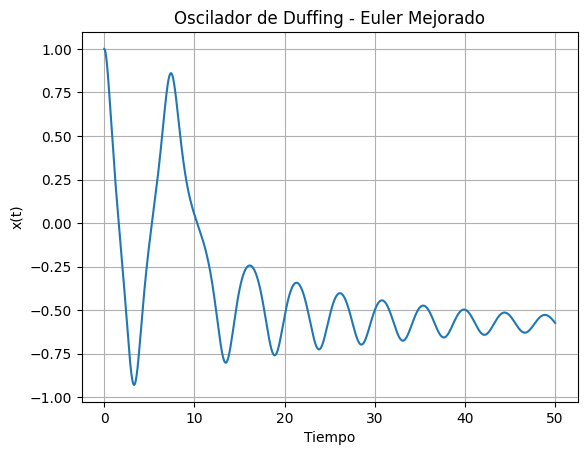

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
delta = 0.1
alpha = -1.0
beta = 3.0
beta_min = 0
beta_max = 10
beta_pasos = 1
x0 = 1.0
v0 = 0.0
t_max = 50
h = 0.01
t = np.arange(0, t_max + h, h)
N = len(t)

# Inicialización
x_heun = np.zeros(N)
v_heun = np.zeros(N)
x_heun[0] = x0
v_heun[0] = v0

# Iteración
for i in range(N-1):
    # Predictor (Euler)
    x_pred = x_heun[i] + h * v_heun[i]
    v_pred = v_heun[i] + h * (-delta*v_heun[i] - alpha*x_heun[i] - beta*x_heun[i]**3)
    
    # Corrector (Heun)
    x_heun[i+1] = x_heun[i] + h/2 * (v_heun[i] + v_pred)
    v_heun[i+1] = v_heun[i] + h/2 * ( (-delta*v_heun[i] - alpha*x_heun[i] - beta*x_heun[i]**3) + \
                               (-delta*v_pred - alpha*x_pred - beta*x_pred**3) )

# Gráfico
plt.figure()
plt.plot(t, x_heun)
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Oscilador de Duffing - Euler Mejorado')
plt.grid(True)
plt.show()

### Método de Runge-Kuta de 4 orden

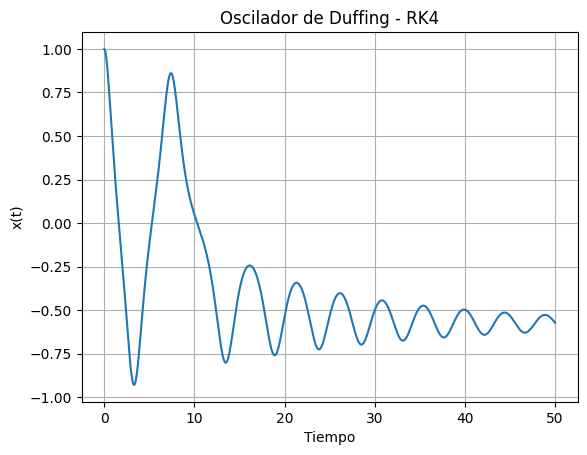

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
delta = 0.1
alpha = -1.0
beta = 3.0
beta_min = 0
beta_max = 10
beta_pasos = 1
x0 = 1.0
v0 = 0.0
t_max = 50
h = 0.01
t = np.arange(0, t_max + h, h)
N = len(t)

# Inicialización
x_rk4 = np.zeros(N)
v_rk4 = np.zeros(N)
x_rk4[0] = x0
v_rk4[0] = v0

# Iteración
for i in range(N-1):
    # Pendientes k1
    k1x = v_rk4[i]
    k1v = -delta*v_rk4[i] - alpha*x_rk4[i] - beta*x_rk4[i]**3
    
    # Pendientes k2
    k2x = v_rk4[i] + h/2 * k1v
    k2v = -delta*(v_rk4[i] + h/2*k1v) - alpha*(x_rk4[i] + h/2*k1x) - beta*(x_rk4[i] + h/2*k1x)**3
    
    # Pendientes k3
    k3x = v_rk4[i] + h/2 * k2v
    k3v = -delta*(v_rk4[i] + h/2*k2v) - alpha*(x_rk4[i] + h/2*k2x) - beta*(x_rk4[i] + h/2*k2x)**3
    
    # Pendientes k4
    k4x = v_rk4[i] + h * k3v
    k4v = -delta*(v_rk4[i] + h*k3v) - alpha*(x_rk4[i] + h*k3x) - beta*(x_rk4[i] + h*k3x)**3
    
    # Actualización
    x_rk4[i+1] = x_rk4[i] + h/6 * (k1x + 2*k2x + 2*k3x + k4x)
    v_rk4[i+1] = v_rk4[i] + h/6 * (k1v + 2*k2v + 2*k3v + k4v)

# Gráfico
plt.figure()
plt.plot(t, x_rk4)
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Oscilador de Duffing - RK4')
plt.grid(True)
plt.show()

### Cálculo de Errores del ejemplo del oscilador de Duffing
El cálculo de los errores para el método de Euler se obtiene de las ecuaciones para como
$^TE_x=\frac{h^2}{2}\frac{d^2x}{dt^2}+O(h3)=\frac{h^2}{2}(-\delta v-\alpha x-\beta x^3)+O(h3)$
y el error para la velocidad  como:
$^TE_v=\frac{h^2}{2}\frac{d^2v}{dt^2}+O(h3)=\frac{h^2}{2}(-\delta \left[-\delta v-\alpha x-\beta x^3\right]-\alpha v-3\beta x^2v)+O(h3)$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Parámetros
gamma = 0.3
theta = 0.5
beta = 1.0
delta = 0.4
omega = 1.2
x0 = 0.5
v0 = 0.0
t_max = 20
h = 0.01
t = np.arange(0, t_max + h, h)
N = len(t)

# Solución de referencia (RK4 con h_ref = 0.001)
h_ref = 0.001
t_ref = np.arange(0, t_max + h_ref, h_ref)
N_ref = len(t_ref)
x_ref = np.zeros(N_ref)
v_ref = np.zeros(N_ref)
x_ref[0] = x0
v_ref[0] = v0

for i in range(N_ref-1):
    k1x = v_ref[i]
    k1v = -gamma*v_ref[i] - x_ref[i] - theta*x_ref[i]**2 - beta*x_ref[i]**3 + delta*np.cos(omega*t_ref[i])
    
    k2x = v_ref[i] + h_ref/2*k1v
    k2v = -gamma*(v_ref[i] + h_ref/2*k1v) - (x_ref[i] + h_ref/2*k1x) - theta*(x_ref[i] + h_ref/2*k1x)**2 - beta*(x_ref[i] + h_ref/2*k1x)**3 + delta*np.cos(omega*(t_ref[i] + h_ref/2))
    
    k3x = v_ref[i] + h_ref/2*k2v
    k3v = -gamma*(v_ref[i] + h_ref/2*k2v) - (x_ref[i] + h_ref/2*k2x) - theta*(x_ref[i] + h_ref/2*k2x)**2 - beta*(x_ref[i] + h_ref/2*k2x)**3 + delta*np.cos(omega*(t_ref[i] + h_ref/2))
    
    k4x = v_ref[i] + h_ref*k3v
    k4v = -gamma*(v_ref[i] + h_ref*k3v) - (x_ref[i] + h_ref*k3x) - theta*(x_ref[i] + h_ref*k3x)**2 - beta*(x_ref[i] + h_ref*k3x)**3 + delta*np.cos(omega*(t_ref[i] + h_ref))
    
    x_ref[i+1] = x_ref[i] + h_ref/6*(k1x + 2*k2x + 2*k3x + k4x)
    v_ref[i+1] = v_ref[i] + h_ref/6*(k1v + 2*k2v + 2*k3v + k4v)

# Cálculo del error local en Euler
tau_x = (h**2 / 2) * (-delta * v_euler - alpha * x_euler - beta * x_euler**3)
tau_v = (h**2 / 2) * (-delta * (-delta * v_euler - alpha * x_euler - beta * x_euler**3) - alpha * v_euler - 3 * beta * x_euler**2 * v_euler)

error_local_euler = np.sqrt(np.mean(tau_x**2 + tau_v**2))
print(f"Error local Euler: {error_local_euler}")

# Cálculo del error local en Heun
d2x = -delta * v_heun - alpha * x_heun - beta * x_heun**3
d2v = -delta * d2x - alpha * v_heun - 3 * beta * x_heun**2 * v_heun
d3x = -delta * d2x - alpha * v_heun - 3 * beta * x_heun**2 * v_heun
d3v = -delta * d2v - alpha * d2x - 6 * beta * x_heun * v_heun**2 - 3 * beta * x_heun**2 * d2x

tau_x = (h**3 / 6) * d3x
tau_v = (h**3 / 6) * d3v

error_local_heun = np.sqrt(np.mean(tau_x**2 + tau_v**2))
print(f"Error local Heun: {error_local_heun}")

Error local Euler: 1.2051015628092098e-05
Error local Heun: 8.783147209530299e-08
